<a href="https://colab.research.google.com/github/christinaxliu/research/blob/main/JPL-Caltech/PlanetarySystemClassification/PlanetarySystemClassification_AA2023PaperFramework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apply planetary system architecture framework mentioned by the paper (https://www.aanda.org/articles/aa/pdf/2023/02/aa43751-22.pdf) on the combined dataset joined from the NASA Exoplanet Archive (https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars) and the Habitable Worlds Catalog (HWC), PHL @ UPR Arecibo (https://phl.upr.edu/hwc/data).

In [197]:
from __future__ import division

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import warnings
from google.colab import drive

In [198]:
pd.options.mode.copy_on_write = True
warnings.filterwarnings("ignore")

In [201]:
# Constants and methods for plotting graphs

# Mapping from exoplanet type to the corresponding color in the plotting graph
exoplanet_type_colors = {
    'Gas-Giant': 'wheat',
    'Neptune-Like': 'lightsteelblue',
    'Super-Earth': 'salmon',
    'Terrestrial': 'cyan'
}

# Mapping from exoplanet type to the corresponding legend title in the plotting graph
exoplanet_type_labels = {
    'Gas-Giant': 'Gas Giants (1,746 in total)',
    'Neptune-Like': 'Neptune Like Planets (1,942 in total)',
    'Super-Earth': 'Super Earths (1,702 in total)',
    'Terrestrial': 'Terrestrial Planets (201 in total)'
}

sun_like_g_star_host_exoplanet_type_labels = {
    'Gas-Giant': 'Gas Giants (277 in total)',
    'Neptune-Like': 'Neptune Like Planets (100 in total)',
    'Super-Earth': 'Super Earths (42 in total)',
    'Terrestrial': 'Terrestrial Planets (1 in total)'
}

stellar_system_exoplanet_type_labels = {
    'Gas-Giant': 'Gas Giants',
    'Neptune-Like': 'Neptune Like Planets',
    'Super-Earth': 'Super Earths',
    'Terrestrial': 'Terrestrial Planets'
}

solar_system_planets_colors = {
    'Mercury': 'gray',
    'Venus': 'goldenrod',
    'Earth': 'royalblue',
    'Mars': 'orangered',
    'Jupiter': 'peru',
    'Saturn': 'gold',
    'Uranus': 'powderblue',
    'Neptune': 'deepskyblue'
}

solar_system_planets_labels = {
    'Mercury': 'Mercury',
    'Venus': 'Venus',
    'Earth': 'Earth',
    'Mars': 'Mars',
    'Jupiter': 'Jupiter',
    'Saturn': 'Saturn',
    'Uranus': 'Uranus',
    'Neptune': 'Neptune'
}

exoplanet_type_colors_with_solar_system_planets = {
    'Gas-Giant': 'wheat',
    'Neptune-Like': 'lightsteelblue',
    'Super-Earth': 'salmon',
    'Terrestrial': 'cyan',
    'Mercury': 'gray',
    'Venus': 'goldenrod',
    'Earth': 'royalblue',
    'Mars': 'orangered',
    'Jupiter': 'peru',
    'Saturn': 'gold',
    'Uranus': 'powderblue',
    'Neptune': 'deepskyblue'
}

exoplanet_type_labels_with_solar_system_planets = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'Mercury': 'Mercury',
    'Venus': 'Venus',
    'Earth': 'Earth',
    'Mars': 'Mars',
    'Jupiter': 'Jupiter',
    'Saturn': 'Saturn',
    'Uranus': 'Uranus',
    'Neptune': 'Neptune'
}

exoplanet_type_with_hz_colors = {
    'Gas-Giant': 'wheat',
    'Neptune-Like': 'lightsteelblue',
    'Super-Earth': 'salmon',
    'Terrestrial': 'cyan',
    'HabitableZone-Planets': 'lime'
}

exoplanet_type_with_hz_labels = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

exoplanet_type_with_hz_colors_with_earth = {
    'Gas-Giant': 'wheat',
    'Neptune-Like': 'lightsteelblue',
    'Super-Earth': 'salmon',
    'Terrestrial': 'cyan',
    'HabitableZone-Planets': 'lime',
    'Earth': 'lime'
}

exoplanet_type_with_hz_labels_with_earth = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)',
    'Earth': 'Earth'
}

exoplanet_type_with_hz_zone_inner_colors = {
    'Gas-Giant': 'red',
    'Neptune-Like': 'red',
    'Super-Earth': 'red',
    'Terrestrial': 'red',
    'HabitableZone-Planets': 'red'
}

exoplanet_type_with_hz_zone_inner_labels = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

exoplanet_type_with_hz_zone_outer_colors = {
    'Gas-Giant': 'blue',
    'Neptune-Like': 'blue',
    'Super-Earth': 'blue',
    'Terrestrial': 'blue',
    'HabitableZone-Planets': 'blue'
}

exoplanet_type_with_hz_zone_outer_labels = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

# Plot selected exoplanets with sizeable circles in proportion to the exoplanets' radii
def plot_selected_exoplanets_with_size_and_label(ax, #axes object for plotting graph
                                  exoplanets_data, # DataFrame object that contains exoplanet data
                                  x_field, # Data field for x axis
                                  y_field, # Data field for y axis
                                  size_field, # Data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Edge color for the data points in the graph
                                  label, # Legend lable for the data points in the graph
                                  scale_size # Scale proportion for circle representing star in graph
                                  ):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               label=label)

def plot_selected_exoplanets_with_size(ax, #axes object for plotting graph
                                  exoplanets_data, # DataFrame object that contains exoplanet data
                                  x_field, # Data field for x axis
                                  y_field, # Data field for y axis
                                  size_field, # Data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Edge color for the data points in the graph
                                  scale_size, # Scale proportion for circle representing star in graph
                                  linewidths=None
                                  ):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               linewidths=linewidths)

def plot_exoplanets_with_size_only(ax,
                                   exoplanets_data,
                                   x_field,
                                   y_field,
                                   size_field,
                                   type_field,
                                   hz_status_field,
                                   scale_size,
                                   edgecolors,
                                   linewidths,
                                   exoplanet_color_map,
                                   exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
        plot_selected_exoplanets_with_size(ax=ax,
                                           exoplanets_data=exoplanets_data,
                                           x_field=x_field,
                                           y_field=y_field,
                                           size_field=size_field,
                                           is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                           color=exoplanet_color_map[exoplanet_type],
                                           edgecolors=edgecolors,
                                           scale_size=scale_size,
                                           linewidths=linewidths)

def plot_exoplanets_with_size_and_label(ax, exoplanets_data, x_field, y_field, size_field, type_field, hz_status_field, scale_size, edgecolors, exoplanet_color_map, exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
            plot_selected_exoplanets_with_size_and_label(ax=ax,
                                      exoplanets_data=exoplanets_data,
                                      x_field=x_field,
                                      y_field=y_field,
                                      size_field=size_field,
                                      is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                      color=exoplanet_color_map[exoplanet_type],
                                      edgecolors=edgecolors,
                                      label=exoplanet_label_map[exoplanet_type],
                                      scale_size=scale_size)

def plot_selected_exoplanet_hz_zones(ax,
                                     exoplanets_data,
                                     x_field,
                                     y_field,
                                     is_selected,
                                     color,
                                     edgecolors,
                                     scale_size,
                                     alpha):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               alpha=alpha)

def plot_exoplanet_hz_zones(ax,
                            exoplanets_data,
                            x_field,
                            y_field,
                            type_field,
                            scale_size,
                            alpha,
                            exoplanet_color_map,
                            exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
        plot_selected_exoplanet_hz_zones(ax=ax,
                                         exoplanets_data=exoplanets_data,
                                         x_field=x_field,
                                         y_field=y_field,
                                         is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                         color=exoplanet_color_map[exoplanet_type],
                                         edgecolors=exoplanet_color_map[exoplanet_type],
                                         scale_size=scale_size,
                                         alpha=alpha)

# Plot a stellar system in the graph
def plot_a_stellar_system(st_mass_vs_pl_orbit_plot_data,
                          subplot_xlim_min,
                          subplot_xlim_max,
                          subplot_ylim_min,
                          subplot_ylim_max,
                          plot_title,
                          exoplanet_color_map,
                          exoplanet_label_map,
                          legend_loc='lower right'):
    fig = plt.figure(figsize=(11,6))
    ax = fig.add_subplot(111, facecolor='0.99', xscale='log')

    ax.set_xlim(subplot_xlim_min, subplot_xlim_max)
    ax.set_ylim(subplot_ylim_min, subplot_ylim_max)
    ax.grid(color='0.4')
    ax.set_title(plot_title, fontweight ='bold')
    ax.title.set_fontsize(18)
    ax.set_xlabel('Exoplanet Semi-Major Axis (AU in Log)', fontweight ='bold')
    ax.xaxis.label.set_fontsize(15)
    ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
    ax.yaxis.label.set_fontsize(15)

    # Plot exoplanets
    plot_exoplanets_with_size_and_label(ax=ax,
                                        exoplanets_data=st_mass_vs_pl_orbit_plot_data,
                                        x_field='pl_orbsmax',
                                        y_field='st_mass',
                                        size_field='pl_rade',
                                        type_field='pl_type',
                                        hz_status_field='pl_hz_status',
                                        scale_size=35,
                                        edgecolors='black',
                                        exoplanet_color_map=exoplanet_color_map,
                                        exoplanet_label_map=exoplanet_label_map)

    # Plot habitable zone inner and outer boundaries
    hz_inner_boundary_x = st_mass_vs_pl_orbit_plot_data['hz_zone_inner'].to_numpy()[0]
    hz_outer_boundary_x = st_mass_vs_pl_orbit_plot_data['hz_zone_outer'].to_numpy()[0]

    plt.vlines(x=hz_inner_boundary_x,
               ymin=subplot_ylim_min,
               ymax=subplot_ylim_max,
               colors='green',
               linestyles='dashed',
               label='Habitable Zone')

    plt.vlines(x=hz_outer_boundary_x,
               ymin=subplot_ylim_min,
               ymax=subplot_ylim_max,
               colors='green',
               linestyles='dashed')

    ax.add_patch(plt.Rectangle(xy=(hz_inner_boundary_x, subplot_ylim_min),
                               width=hz_outer_boundary_x - hz_inner_boundary_x,
                               height=subplot_ylim_max - subplot_ylim_min,
                               color='lightgreen',
                               alpha=0.15))

    ax.set_yticklabels(ax.get_yticks(), weight='bold', size=15)
    ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=15)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

    legend_properties = {'size':13, 'weight':'bold'}
    legend = ax.legend(scatterpoints=1,
                      labelcolor='black',
                      loc=legend_loc,
                      markerscale=2,
                      shadow=True,
                      framealpha=0.85,
                      prop=legend_properties)
    set_legend_size(legend, len(exoplanet_label_map), 80)

    frame = legend.get_frame()
    frame.set_facecolor('0.99')

# Plot stellar systems one by one. Each stellar system is plotted in a separate graph
def plot_stellar_systems_one_by_one(plot_data,
                                    host_star_names,
                                    subplot_xlim_min,
                                    subplot_xlim_max,
                                    subplot_ylim_min,
                                    subplot_ylim_max,
                                    exoplanet_color_map,
                                    exoplanet_label_map,
                                    legend_loc='lower right'):
  for host_star_name in host_star_names:
      plot_title=f"Star Mass vs. Exoplanet Orbit Semi-Major Axis: {host_star_name} System"
      plot_data_one_stellar_system = plot_data.loc[(plot_data['hostname'] == host_star_name)]
      plot_a_stellar_system(st_mass_vs_pl_orbit_plot_data=plot_data_one_stellar_system,
                            subplot_xlim_min=subplot_xlim_min,
                            subplot_xlim_max=subplot_xlim_max,
                            subplot_ylim_min=subplot_ylim_min,
                            subplot_ylim_max=subplot_ylim_max,
                            plot_title=plot_title,
                            exoplanet_color_map=exoplanet_color_map,
                            exoplanet_label_map=exoplanet_label_map,
                            legend_loc=legend_loc)

# Plot a stellar system as a subplot specified by subplot_index in the grid
def plot_a_stellar_system_in_grid(st_mass_vs_pl_orbit_plot_data,
                                  fig,
                                  grid_rows,
                                  grid_columns,
                                  subplot_index,
                                  subplot_xlim_min,
                                  subplot_xlim_max,
                                  subplot_ylim_min,
                                  subplot_ylim_max,
                                  plot_title,
                                  exoplanet_color_map,
                                  exoplanet_label_map,
                                  legend_loc='lower right'):
    ax = fig.add_subplot(grid_rows, grid_columns, subplot_index, facecolor='0.99', xscale='log')

    ax.set_xlim(subplot_xlim_min, subplot_xlim_max)
    ax.set_ylim(subplot_ylim_min, subplot_ylim_max)
    ax.grid(color='0.4')
    ax.set_title(plot_title, fontweight ='bold')
    ax.title.set_fontsize(18)
    ax.set_xlabel('Exoplanet Semi-Major Axis (AU in Log)', fontweight ='bold')
    ax.xaxis.label.set_fontsize(15)
    ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
    ax.yaxis.label.set_fontsize(15)

    # Plot exoplanets
    plot_exoplanets_with_size_and_label(ax=ax,
                                        exoplanets_data=st_mass_vs_pl_orbit_plot_data,
                                        x_field='pl_orbsmax',
                                        y_field='st_mass',
                                        size_field='pl_rade',
                                        type_field='pl_type',
                                        hz_status_field='pl_hz_status',
                                        scale_size=35,
                                        edgecolors='black',
                                        exoplanet_color_map=exoplanet_color_map,
                                        exoplanet_label_map=exoplanet_label_map)

    # Plot habitable zone inner and outer boundaries
    hz_inner_boundary_x = st_mass_vs_pl_orbit_plot_data['hz_zone_inner'].to_numpy()[0]
    hz_outer_boundary_x = st_mass_vs_pl_orbit_plot_data['hz_zone_outer'].to_numpy()[0]

    plt.vlines(x=hz_inner_boundary_x,
               ymin=subplot_ylim_min,
               ymax=subplot_ylim_max,
               colors='green',
               linestyles='dashed',
               label='Habitable Zone')

    plt.vlines(x=hz_outer_boundary_x,
               ymin=subplot_ylim_min,
               ymax=subplot_ylim_max,
               colors='green',
               linestyles='dashed')

    ax.add_patch(plt.Rectangle(xy=(hz_inner_boundary_x, subplot_ylim_min),
                               width=hz_outer_boundary_x - hz_inner_boundary_x,
                               height=subplot_ylim_max - subplot_ylim_min,
                               color='lightgreen',
                               alpha=0.15))

    ax.set_yticklabels(ax.get_yticks(), weight='bold', size=15)
    ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=15)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

    legend_properties = {'size':13, 'weight':'bold'}
    legend = ax.legend(scatterpoints=1,
                      labelcolor='black',
                      loc=legend_loc,
                      markerscale=2,
                      shadow=True,
                      framealpha=0.85,
                      prop=legend_properties)
    set_legend_size(legend, len(exoplanet_label_map), 80)

    frame = legend.get_frame()
    frame.set_facecolor('0.99')

# Plot stellar systems in the grid, each stellar system is a subplot in the grid
def plot_stellar_systems_in_grid(plot_data,
                                 host_star_names,
                                 figsize_width,
                                 figsize_height,
                                 grid_rows,
                                 grid_columns,
                                 subplot_xlim_min,
                                 subplot_xlim_max,
                                 subplot_ylim_min,
                                 subplot_ylim_max,
                                 exoplanet_color_map,
                                 exoplanet_label_map,
                                 legend_loc='lower right'):
  fig = plt.figure(figsize=(figsize_width, figsize_height))
  subplot_index = 1
  for host_star_name in host_star_names:
      plot_title=f"Star Mass vs. Exoplanet Orbit Semi-Major Axis: {host_star_name} System"
      plot_data_one_stellar_system = plot_data.loc[(plot_data['hostname'] == host_star_name)]
      plot_a_stellar_system_in_grid(st_mass_vs_pl_orbit_plot_data=plot_data_one_stellar_system,
                                    fig=fig,
                                    grid_rows=grid_rows,
                                    grid_columns=grid_columns,
                                    subplot_index=subplot_index,
                                    plot_title=plot_title,
                                    subplot_xlim_min=subplot_xlim_min,
                                    subplot_xlim_max=subplot_xlim_max,
                                    subplot_ylim_min=subplot_ylim_min,
                                    subplot_ylim_max=subplot_ylim_max,
                                    exoplanet_color_map=exoplanet_color_map,
                                    exoplanet_label_map=exoplanet_label_map,
                                    legend_loc=legend_loc)
      subplot_index += 1

# Set legend with fixed size
def set_legend_size(legend, legend_count, legend_size):
    for i in range (legend_count):
        legend.legend_handles[i]._sizes = [legend_size]

# Helper method to generate the polynomial that fits the habitability zone boundaries
def fit_curve_with_polynomial(degreeFit, xVals, yVals):
    # Create empty matrix to fill with our X values
    X = np.zeros((degreeFit + 1, degreeFit + 1))

    # Create empty answer matrix containing each coefficient of the nth degree polynomial (a0, a1, a2, ..., an)
    a = np.zeros((degreeFit + 1, 1))

    # Create empty matrix to fill with our Y values
    Y = np.zeros((degreeFit + 1, 1))

    # Fill X Matrix
    for row in range(X.shape[0]) :
        for col in range(X.shape[1]) :
            power = row + col
            X[row][col] = np.sum(xVals**power)

    # Fill Y Matrix
    for row in range(degreeFit+1) :
        power = row
        Y[row][0] = np.sum(xVals**power * (yVals))

    # Compute the inverse of the Matrix X
    XInverse = np.linalg.inv(X)

    # Multip\ly XInverse by Y Matrix to get the answer
    ans = np.matmul(XInverse, Y)

    # Reverse order of coefficients so they're ordered from an, a(n-1), ..., a0.
    poly_coefs = ans[::-1].flatten()

    return poly_coefs

# Helper method to fit a curve
def fit_curve(curve_fit_data, x_filed, y_field, degree, num_data_points_to_gen):
    # Generate the polynomial curve that best fits with the data and get the coefficients for the polynomial
    poly_coefs = fit_curve_with_polynomial(degree, curve_fit_data[x_filed], curve_fit_data[y_field])

    # Create x coordinates between (lower limit) and (upper limit) with a specified number of points in between
    lower_limit = np.min(curve_fit_data[x_filed])
    upper_limit = np.max(curve_fit_data[x_filed])
    x = np.linspace(lower_limit, upper_limit, num_data_points_to_gen)

    # Find y-values based on the coefficients array we already found
    y = np.polyval(poly_coefs, x)

    return x, y, poly_coefs

In [200]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
# Exoplanet data from NASA Exoplanet Archive - Planetary Systems Composite Data on September 15th, 2024:
# https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars

nasa_exoplanets_filename = '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/PlanetarySystemClassification/NASA_PSCompPars_2025.01.28.csv'
nasa_exoplanets_data = pd.read_table(nasa_exoplanets_filename,
                                     skiprows=89,
                                     sep=',',
                                     header=None,
                                     index_col=None,
                                     names = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2'],
                                     skipfooter=0,
                                     engine='python')

In [203]:
# Sanity check the first several rows of data to ensure data is read correctly
nasa_exoplanets_data.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [204]:
# Sanity check the last several rows of data to ensure data is read correctly.
nasa_exoplanets_data.tail()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
5829,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,0.000023,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5830,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,0.064000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5831,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,0.570000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5832,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,2.800000,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513
5833,xi Aql b,xi Aql,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,0,136.970000,0.110000,...,-0.55975,4.70964,0.023,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837


In [205]:
# Get the statistics about the data
nasa_exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834 entries, 0 to 5833
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5834 non-null   object 
 1   hostname         5834 non-null   object 
 2   sy_snum          5834 non-null   int64  
 3   sy_pnum          5834 non-null   int64  
 4   discoverymethod  5834 non-null   object 
 5   disc_year        5834 non-null   int64  
 6   disc_facility    5834 non-null   object 
 7   pl_controv_flag  5834 non-null   int64  
 8   pl_orbper        5548 non-null   float64
 9   pl_orbpererr1    5051 non-null   float64
 10  pl_orbpererr2    5051 non-null   float64
 11  pl_orbperlim     5548 non-null   float64
 12  pl_orbsmax       5550 non-null   float64
 13  pl_orbsmaxerr1   3607 non-null   float64
 14  pl_orbsmaxerr2   3607 non-null   float64
 15  pl_orbsmaxlim    5551 non-null   float64
 16  pl_rade          5813 non-null   float64
 17  pl_radeerr1   

In [206]:
# Cast values to corresponding data types
nasa_exoplanets_data['pl_name'] = nasa_exoplanets_data['pl_name'].astype(str)
nasa_exoplanets_data['hostname'] = nasa_exoplanets_data['hostname'].astype(str)
pd.to_numeric(nasa_exoplanets_data['sy_snum'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_pnum'], errors = "coerce")
nasa_exoplanets_data['discoverymethod'] = nasa_exoplanets_data['discoverymethod'].astype(str)
pd.to_numeric(nasa_exoplanets_data['disc_year'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_controv_flag'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbper'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbpererr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbpererr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbperlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbsmax'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbsmaxerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbsmaxerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbsmaxlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_rade'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_radeerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_radeerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_radelim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_radj'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_radjerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_radjerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_radjlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmasse'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmasseerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmasseerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmasselim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmassj'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmassjerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmassjerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmassjlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmassprov'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbeccen'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbeccenerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbeccenerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbeccenlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_insol'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_insolerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_insolerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_insollim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_eqt'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_eqterr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_eqterr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_eqtlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['ttv_flag'], errors = "coerce")
nasa_exoplanets_data['st_spectype'] = nasa_exoplanets_data['st_spectype'].astype(str)
pd.to_numeric(nasa_exoplanets_data['st_teff'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_tefferr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_tefferr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_tefflim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_rad'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_raderr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_raderr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_radlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_mass'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_masserr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_masserr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_masslim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_met'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_meterr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_meterr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_metlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_metratio'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_logg'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_loggerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_loggerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_logglim'], errors = "coerce")
nasa_exoplanets_data['rastr'] = nasa_exoplanets_data['rastr'].astype(str)
pd.to_numeric(nasa_exoplanets_data['ra'], errors = "coerce")
nasa_exoplanets_data['decstr'] = nasa_exoplanets_data['decstr'].astype(str)
pd.to_numeric(nasa_exoplanets_data['dec'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_dist'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_disterr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_disterr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_vmag'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_vmagerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_vmagerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_kmag'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_kmagerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_kmagerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_gaiamag'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_gaiamagerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_gaiamagerr2'], errors = "coerce")

,sy_gaiamagerr2
0,-0.003848
1,-0.003903
2,-0.002826
3,-0.000351
4,-0.000603
...,...
5829,-0.008937
5830,-0.008937
5831,-0.008937
5832,-0.008513


In [207]:
# Change any fields with empty spaces to NaN values so we can clean them up later on
nasa_exoplanets_data = nasa_exoplanets_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

In [208]:
nasa_exoplanets_data['pl_controv_flag'].value_counts()

,count
pl_controv_flag,
0,5803
1,31


In [209]:
# Only selects exoplanets with pl_controv_flag == 0
nasa_exoplanets_data = nasa_exoplanets_data.loc[(nasa_exoplanets_data['pl_controv_flag'] == 0)]

In [210]:
# Expand the NASA data with stellar spectral type (first letter in upper case)
nasa_exoplanets_data['st_spectype_short'] = nasa_exoplanets_data['st_spectype'].apply(lambda x : x[0].upper())
nasa_exoplanets_data.loc[(nasa_exoplanets_data['st_spectype_short'] == 'N'), 'st_spectype_short'] = np.nan
nasa_exoplanets_data['st_spectype_short'].value_counts()

,count
st_spectype_short,
G,705
K,580
M,458
F,255
A,19
B,7
W,2
D,2
L,1


In [211]:
nasa_exoplanets_data['pl_tsurf_k'] = 1.13 * nasa_exoplanets_data['st_teff'] * ((1 - 0.306) ** 0.25) * (((nasa_exoplanets_data['st_rad'] * 696000) / (2 * nasa_exoplanets_data['pl_orbsmax'] * 149598023)) ** 0.5)
nasa_exoplanets_data['pl_tsurf_c'] = nasa_exoplanets_data['pl_tsurf_k'] - 273.15
nasa_exoplanets_data['pl_tsurf_k'].describe()

,pl_tsurf_k
count,5259.000000
mean,880.646217
std,500.923856
min,1.221287
25%,513.145034
50%,813.548742
75%,1166.659644
max,4176.941844


In [212]:
nasa_exoplanets_data.loc[(np.isnan(nasa_exoplanets_data['pl_tsurf_c'])), 'pl_hz_status'] = 'N/A'
nasa_exoplanets_data.loc[((~np.isnan(nasa_exoplanets_data['pl_tsurf_c'])) & (nasa_exoplanets_data['pl_tsurf_c'] >= 0) & (nasa_exoplanets_data['pl_tsurf_c'] <= 100)), 'pl_hz_status'] = 'In HZ'
nasa_exoplanets_data.loc[((~np.isnan(nasa_exoplanets_data['pl_tsurf_c'])) & (nasa_exoplanets_data['pl_tsurf_c'] > 100)), 'pl_hz_status'] = 'Too Hot'
nasa_exoplanets_data.loc[((~np.isnan(nasa_exoplanets_data['pl_tsurf_c'])) & (nasa_exoplanets_data['pl_tsurf_c'] < 0)), 'pl_hz_status'] = 'Too Cold'
nasa_exoplanets_data['pl_hz_status'].value_counts()

,count
pl_hz_status,
Too Hot,4494
N/A,544
Too Cold,500
In HZ,265


In [213]:
nasa_exoplanet_types_filename = '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/PlanetarySystemClassification/NasaCatalogExoplanetType_2025.01.04.csv'
nasa_exoplanet_types_data = pd.read_csv(nasa_exoplanet_types_filename)
nasa_exoplanet_types_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pl_name  5800 non-null   object
 1   pl_type  5800 non-null   object
dtypes: object(2)
memory usage: 90.8+ KB


In [214]:
nasa_exoplanets_data = pd.merge(nasa_exoplanets_data,
                                nasa_exoplanet_types_data[['pl_type']],
                                how="left",
                                left_on=nasa_exoplanets_data['pl_name'].str.lower(),
                                right_on=nasa_exoplanet_types_data['pl_name'].str.lower())
nasa_exoplanets_data = nasa_exoplanets_data.drop(['key_0'], axis = 1)
nasa_exoplanets_data['pl_type'].value_counts()

,count
pl_type,
Neptune-Like,1967
Gas-Giant,1764
Super-Earth,1708
Terrestrial,207


In [215]:
hwc_exoplanets_filename = '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/PlanetarySystemClassification/hwc-09-06-2024.csv'
hwc_exoplanets_data = pd.read_csv(hwc_exoplanets_filename)
hwc_exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Columns: 118 entries, P_NAME to S_CONSTELLATION_ENG
dtypes: float64(81), int64(18), object(19)
memory usage: 5.0+ MB


In [216]:
hwc_exoplanets_data = hwc_exoplanets_data.loc[~np.isnan(hwc_exoplanets_data['P_HABITABLE'])]
hwc_exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Columns: 118 entries, P_NAME to S_CONSTELLATION_ENG
dtypes: float64(81), int64(18), object(19)
memory usage: 5.0+ MB


In [217]:
exoplanets_data = pd.merge(nasa_exoplanets_data,
                           hwc_exoplanets_data[['P_HABITABLE']],
                           how="left",
                           left_on=nasa_exoplanets_data['pl_name'].str.lower(),
                           right_on=hwc_exoplanets_data['P_NAME'].str.lower())
exoplanets_data = exoplanets_data.drop(['key_0'], axis = 1)
exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5803 entries, 0 to 5802
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pl_name            5803 non-null   object 
 1   hostname           5803 non-null   object 
 2   sy_snum            5803 non-null   int64  
 3   sy_pnum            5803 non-null   int64  
 4   discoverymethod    5803 non-null   object 
 5   disc_year          5803 non-null   int64  
 6   disc_facility      5803 non-null   object 
 7   pl_controv_flag    5803 non-null   int64  
 8   pl_orbper          5520 non-null   float64
 9   pl_orbpererr1      5026 non-null   float64
 10  pl_orbpererr2      5026 non-null   float64
 11  pl_orbperlim       5520 non-null   float64
 12  pl_orbsmax         5522 non-null   float64
 13  pl_orbsmaxerr1     3583 non-null   float64
 14  pl_orbsmaxerr2     3583 non-null   float64
 15  pl_orbsmaxlim      5523 non-null   float64
 16  pl_rade            5787 

In [218]:
#
# Solar System Temperatures Reference:
#     https://science.nasa.gov/resource/solar-system-temperatures/
#
# Sun data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html
#
# Mercury data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html
#     https://en.wikipedia.org/wiki/Mercury_(planet)
#
# Venus data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/venusfact.html
#     https://en.wikipedia.org/wiki/Venus
#
# Earth data source:
#     Orbital Eccentricity: https://en.wikipedia.org/wiki/Orbital_eccentricity
#
# Mars data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/marsfact.html
#     https://en.wikipedia.org/wiki/Orbit_of_Mars
#
# Jupiter data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
#     https://en.wikipedia.org/wiki/Jupiter
#
# Saturn data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/saturnfact.html
#     https://en.wikipedia.org/wiki/Saturn
#
# Uranus data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/uranusfact.html
#     https://en.wikipedia.org/wiki/Uranus
#
# Neptune data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/neptunefact.html
#     https://en.wikipedia.org/wiki/Neptune
#

solar_system_planets_facts_data = [['Mercury','Sun',1,8,'',0,'',0,0,0,0,0,0.387,0,0,0,0.383,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Mercury',0],
                                   ['Venus','Sun',1,8,'',0,'',0,0,0,0,0,0.723,0,0,0,0.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Venus',0],
                                   ['Earth','Sun',1,8,'',0,'',0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0167,0,0,0,1,0,0,0,255,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Earth',1],
                                   ['Mars','Sun',1,8,'',0,'',0,0,0,0,0,1.524,0,0,0,0.532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.431,0,0,0,210,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Mars',0],
                                   ['Jupiter','Sun',1,8,'',0,'',0,0,0,0,0,5.204,0,0,0,10.973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Jupiter',0],
                                   ['Saturn','Sun',1,8,'',0,'',0,0,0,0,0,9.573,0,0,0,9.140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Saturn',0],
                                   ['Uranus','Sun',1,8,'',0,'',0,0,0,0,0,19.165,0,0,0,3.981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Uranus',0],
                                   ['Neptune','Sun',1,8,'',0,'',0,0,0,0,0,30.178,0,0,0,3.865,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Neptune',0]]
solar_system_planets_data_columns = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2', 'st_spec_short',
                                          'pl_tsurf_k', 'pl_tsurf_c', 'pl_hz_status', 'pl_type', 'P_HABITABLE']
solar_system_planets_data = pd.DataFrame(solar_system_planets_facts_data, columns=solar_system_planets_data_columns)
pd.to_numeric(solar_system_planets_data['pl_rade'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['pl_insol'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['st_teff'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['st_rad'], errors = "coerce")
solar_system_planets_data

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,st_spec_short,pl_tsurf_k,pl_tsurf_c,pl_hz_status,pl_type,P_HABITABLE
0,Mercury,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Mercury,0
1,Venus,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Venus,0
2,Earth,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Earth,1
3,Mars,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Mars,0
4,Jupiter,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Jupiter,0
5,Saturn,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Saturn,0
6,Uranus,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Uranus,0
7,Neptune,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Neptune,0


In [219]:
solar_system_planets_data['pl_tsurf_k'] = 1.13 * solar_system_planets_data['st_teff'] * ((1 - 0.306) ** 0.25) * (((solar_system_planets_data['st_rad'] * 696000) / (2 * solar_system_planets_data['pl_orbsmax'] * 149598023)) ** 0.5)
solar_system_planets_data['pl_tsurf_c'] = solar_system_planets_data['pl_tsurf_k'] - 273.15
solar_system_planets_data['pl_tsurf_c']

,pl_tsurf_c
0,188.396908
1,64.527543
2,13.975212
3,-40.566530
4,-147.285665
5,-180.350145
6,-207.563128
7,-220.883177


In [220]:
solar_system_planets_data.loc[(np.isnan(solar_system_planets_data['pl_tsurf_c'])), 'pl_hz_status'] = 'N/A'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] >= 0) & (solar_system_planets_data['pl_tsurf_c'] <= 100)), 'pl_hz_status'] = 'In HZ'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] > 100)), 'pl_hz_status'] = 'Too Hot'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] < 0)), 'pl_hz_status'] = 'Too Cold'

In [221]:
solar_system_planets_data.to_csv('/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/PlanetarySystemClassification/SolarSystemPplanetsData.csv')

In [222]:
exoplanets_plot_data = exoplanets_data.loc[(~np.isnan(exoplanets_data['sy_snum'])) & (exoplanets_data['sy_snum'] == 1)
                                           & (~np.isnan(exoplanets_data['st_mass']))
                                           & (~np.isnan(exoplanets_data['pl_orbsmax']))
                                           & (~np.isnan(exoplanets_data['pl_rade']))
                                           & (exoplanets_data['pl_type'] != 'N/A')
                                           & (exoplanets_data['pl_hz_status'] != 'N/A')]

In [223]:
exoplanets_plot_data['hz_zone_inner'] = (((exoplanets_plot_data['st_rad'] * 696000) * (exoplanets_plot_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (373.15 ** 2))) / 149598023
exoplanets_plot_data['hz_zone_outer'] = (((exoplanets_plot_data['st_rad'] * 696000) * (exoplanets_plot_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (273.15 ** 2))) / 149598023

In [224]:
exoplanets_plot_data.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,pl_tsurf_k,pl_tsurf_c,P_HABITABLE,hz_zone_inner,hz_zone_outer
count,4759.0,4759.000000,4759.000000,4759.0,4.719000e+03,4.244000e+03,4.244000e+03,4719.000000,4759.00000,2890.000000,...,4731.000000,4722.000000,4726.000000,4726.000000,4726.000000,4759.000000,4759.000000,4572.000000,4759.000000,4759.000000
mean,1.0,1.773272,2016.464173,0.0,8.890948e+04,1.118182e+05,-2.459326e+04,-0.000636,8.90672,2.114203,...,0.039382,-0.039422,12.530357,0.000562,-0.000562,882.624610,609.474610,0.018810,0.760101,1.418522
std,0.0,1.136387,4.404649,0.0,5.854037e+06,7.214770e+06,1.536037e+06,0.025208,194.79113,96.934839,...,0.245088,0.245320,2.928536,0.000989,0.000989,486.399582,486.399582,0.178953,1.462681,2.729694
min,1.0,1.000000,1995.000000,0.0,1.797190e-01,0.000000e+00,-1.000000e+08,-1.000000,0.00580,0.000000,...,0.011000,-9.995000,2.364310,0.000118,-0.017417,1.221287,-271.928713,0.000000,0.000529,0.000987
25%,1.0,1.000000,2014.000000,0.0,4.485229e+00,1.300000e-05,-1.000000e-03,0.000000,0.05200,0.000660,...,0.020000,-0.033000,10.816100,0.000257,-0.000528,531.253420,258.103420,0.000000,0.360496,0.672767
50%,1.0,1.000000,2016.000000,0.0,1.118716e+01,7.947000e-05,-8.000000e-05,0.000000,0.09500,0.001500,...,0.023000,-0.023000,13.456100,0.000360,-0.000360,819.847120,546.697120,0.000000,0.544656,1.016451
75%,1.0,2.000000,2020.000000,0.0,3.781238e+01,1.000000e-03,-1.300000e-05,0.000000,0.22000,0.006000,...,0.033000,-0.020000,14.856100,0.000528,-0.000257,1160.832086,887.682086,0.000000,0.789504,1.473394
max,1.0,8.000000,2025.000000,0.0,4.020000e+08,4.700000e+08,0.000000e+00,0.000000,7506.00000,5205.000000,...,9.995000,-0.011000,18.966800,0.017417,-0.000118,3169.563245,2896.413245,2.000000,46.863057,87.457105


In [225]:
exoplanets_plot_data['pl_type'].value_counts()

,count
pl_type,
Neptune-Like,1703
Super-Earth,1511
Gas-Giant,1274
Terrestrial,173


In [226]:
exoplanets_plot_data['pl_hz_status'].value_counts()

,count
pl_hz_status,
Too Hot,4119
Too Cold,409
In HZ,231


In [227]:
exoplanets_plot_data['P_HABITABLE'].value_counts()

,count
P_HABITABLE,
0.0,4517
2.0,31
1.0,24


In [228]:
exoplanets_plot_data['st_spectype_short'].value_counts()

,count
st_spectype_short,
G,539
K,468
M,375
F,181
A,13
B,4
S,1
T,1


In [229]:
hz_zone_plot_data = exoplanets_plot_data.loc[(~np.isnan(exoplanets_plot_data['st_teff']))
                                             & (~np.isnan(exoplanets_plot_data['st_rad']))]
hz_zone_plot_data.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,pl_tsurf_k,pl_tsurf_c,P_HABITABLE,hz_zone_inner,hz_zone_outer
count,4759.0,4759.000000,4759.000000,4759.0,4.719000e+03,4.244000e+03,4.244000e+03,4719.000000,4759.00000,2890.000000,...,4731.000000,4722.000000,4726.000000,4726.000000,4726.000000,4759.000000,4759.000000,4572.000000,4759.000000,4759.000000
mean,1.0,1.773272,2016.464173,0.0,8.890948e+04,1.118182e+05,-2.459326e+04,-0.000636,8.90672,2.114203,...,0.039382,-0.039422,12.530357,0.000562,-0.000562,882.624610,609.474610,0.018810,0.760101,1.418522
std,0.0,1.136387,4.404649,0.0,5.854037e+06,7.214770e+06,1.536037e+06,0.025208,194.79113,96.934839,...,0.245088,0.245320,2.928536,0.000989,0.000989,486.399582,486.399582,0.178953,1.462681,2.729694
min,1.0,1.000000,1995.000000,0.0,1.797190e-01,0.000000e+00,-1.000000e+08,-1.000000,0.00580,0.000000,...,0.011000,-9.995000,2.364310,0.000118,-0.017417,1.221287,-271.928713,0.000000,0.000529,0.000987
25%,1.0,1.000000,2014.000000,0.0,4.485229e+00,1.300000e-05,-1.000000e-03,0.000000,0.05200,0.000660,...,0.020000,-0.033000,10.816100,0.000257,-0.000528,531.253420,258.103420,0.000000,0.360496,0.672767
50%,1.0,1.000000,2016.000000,0.0,1.118716e+01,7.947000e-05,-8.000000e-05,0.000000,0.09500,0.001500,...,0.023000,-0.023000,13.456100,0.000360,-0.000360,819.847120,546.697120,0.000000,0.544656,1.016451
75%,1.0,2.000000,2020.000000,0.0,3.781238e+01,1.000000e-03,-1.300000e-05,0.000000,0.22000,0.006000,...,0.033000,-0.020000,14.856100,0.000528,-0.000257,1160.832086,887.682086,0.000000,0.789504,1.473394
max,1.0,8.000000,2025.000000,0.0,4.020000e+08,4.700000e+08,0.000000e+00,0.000000,7506.00000,5205.000000,...,9.995000,-0.011000,18.966800,0.017417,-0.000118,3169.563245,2896.413245,2.000000,46.863057,87.457105


In [230]:
hz_zone_plot_data['hz_zone_inner'] = (((hz_zone_plot_data['st_rad'] * 696000) * (hz_zone_plot_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (373.15 ** 2))) / 149598023
hz_zone_plot_data['hz_zone_outer'] = (((hz_zone_plot_data['st_rad'] * 696000) * (hz_zone_plot_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (273.15 ** 2))) / 149598023

In [231]:
hz_zone_plot_data['hz_zone_inner'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,hz_zone_inner
count,4759.000000
mean,0.760101
std,1.462681
min,0.000529
25%,0.360496
50%,0.544656
75%,0.789504
90%,1.106727
95%,1.608968
99%,5.131036


In [232]:
hz_zone_plot_data['hz_zone_outer'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,hz_zone_outer
count,4759.000000
mean,1.418522
std,2.729694
min,0.000987
25%,0.672767
50%,1.016451
75%,1.473394
90%,2.065403
95%,3.002699
99%,9.575678


In [233]:
solar_system_planets_data['hz_zone_inner'] = (((solar_system_planets_data['st_rad'] * 696000) * (solar_system_planets_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (373.15 ** 2))) / 149598023
solar_system_planets_data['hz_zone_outer'] = (((solar_system_planets_data['st_rad'] * 696000) * (solar_system_planets_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (273.15 ** 2))) / 149598023

In [234]:
solar_system_planets_data['hz_zone_inner']

,hz_zone_inner
0,0.592074
1,0.592074
2,0.592074
3,0.592074
4,0.592074
5,0.592074
6,0.592074
7,0.592074


In [235]:
solar_system_planets_data['hz_zone_outer']

,hz_zone_outer
0,1.104944
1,1.104944
2,1.104944
3,1.104944
4,1.104944
5,1.104944
6,1.104944
7,1.104944


In [236]:
exoplanets_plot_data['pl_orbsmax'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,pl_orbsmax
count,4759.00000
mean,8.90672
std,194.79113
min,0.00580
25%,0.05200
50%,0.09500
75%,0.22000
90%,1.15300
95%,2.76410
99%,20.26926


In [237]:
exoplanets_plot_data['st_mass'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,st_mass
count,4759.000000
mean,0.965358
std,0.412190
min,0.010000
25%,0.810000
50%,0.950000
75%,1.090000
90%,1.280000
95%,1.440000
99%,2.000000


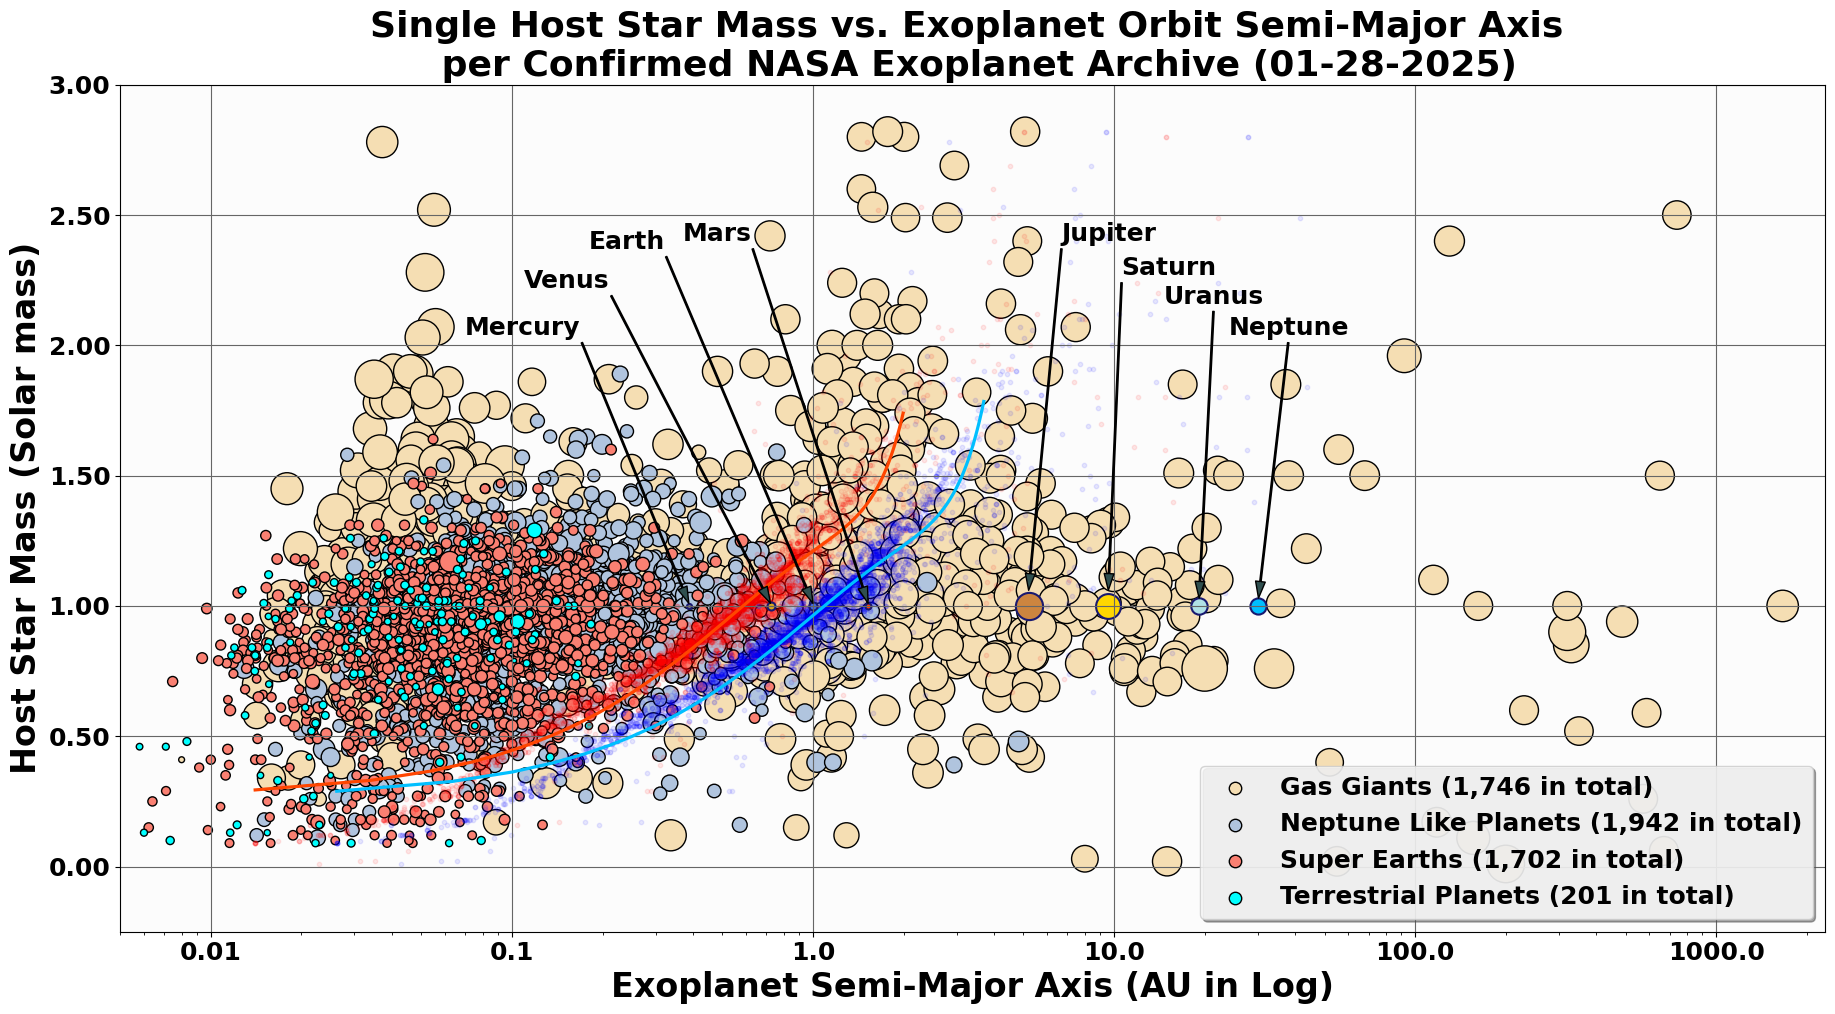

In [238]:
fig = plt.figure(figsize=(22,11))
ax = fig.add_subplot(111, facecolor='0.99', xscale='log')

ax.set_xlim(0.005, 2300)
ax.set_ylim(-0.25, 3)
ax.grid(color='0.4')
ax.set_title('Single Host Star Mass vs. Exoplanet Orbit Semi-Major Axis \n per Confirmed NASA Exoplanet Archive (01-28-2025)', fontweight ='bold')
ax.title.set_fontsize(26)
ax.set_xlabel('Exoplanet Semi-Major Axis (AU in Log)', fontweight ='bold')
ax.xaxis.label.set_fontsize(24)
ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
ax.yaxis.label.set_fontsize(24)

# Plot exoplanets
plot_exoplanets_with_size_and_label(ax=ax,
                                    exoplanets_data=exoplanets_plot_data,
                                    x_field='pl_orbsmax',
                                    y_field='st_mass',
                                    size_field='pl_rade',
                                    type_field='pl_type',
                                    hz_status_field='pl_hz_status',
                                    scale_size=35,
                                    edgecolors='black',
                                    exoplanet_color_map=exoplanet_type_colors,
                                    exoplanet_label_map=exoplanet_type_labels)


# Plot habitable zone inner boundaries
plot_exoplanet_hz_zones(ax=ax,
                        exoplanets_data=hz_zone_plot_data,
                        x_field='hz_zone_inner',
                        y_field='st_mass',
                        type_field='pl_type',
                        scale_size=10,
                        alpha=0.09,
                        exoplanet_color_map=exoplanet_type_with_hz_zone_inner_colors,
                        exoplanet_label_map=exoplanet_type_with_hz_zone_inner_labels)

# Plot habitable zone outer boundaries
plot_exoplanet_hz_zones(ax=ax,
                        exoplanets_data=hz_zone_plot_data,
                        x_field='hz_zone_outer',
                        y_field='st_mass',
                        type_field='pl_type',
                        scale_size=10,
                        alpha=0.09,
                        exoplanet_color_map=exoplanet_type_with_hz_zone_outer_colors,
                        exoplanet_label_map=exoplanet_type_with_hz_zone_outer_labels)


# Plot Solar system planets
plot_exoplanets_with_size_only(ax=ax,
                               exoplanets_data=solar_system_planets_data,
                               x_field='pl_orbsmax',
                               y_field='st_mass',
                               size_field='pl_rade',
                               type_field='pl_type',
                               hz_status_field='pl_hz_status',
                               scale_size=35,
                               edgecolors='midnightblue',
                               linewidths=1.5,
                               exoplanet_color_map=solar_system_planets_colors,
                               exoplanet_label_map=solar_system_planets_labels)

# Labels for indicating Solar system planets
ax.annotate('Mercury', xy=(0.387, 1.01), xytext=(0.07, 2.04),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Venus', xy=(0.723, 1.01), xytext=(0.11, 2.22),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Earth', xy=(1.0, 1.01), xytext=(0.18, 2.37),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Mars', xy=(1.524, 1.01), xytext=(0.37, 2.40),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Jupiter', xy=(5.204, 1.06), xytext=(6.7, 2.40),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Saturn', xy=(9.573, 1.06), xytext=(10.6, 2.27),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Uranus', xy=(19.165, 1.03), xytext=(14.6, 2.16),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Neptune', xy=(30.178, 1.03), xytext=(23.96, 2.04),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))


# Fit the habitable zone inner boundary with curve
hz_inner_curve_fit_data = hz_zone_plot_data.loc[
    (hz_zone_plot_data['hz_zone_inner'] >= 0.01) & (hz_zone_plot_data['hz_zone_inner'] <= 2)]
hz_inner_fit_curve_x, hz_inner_fit_curve_y, hz_inner_poly_coefs = fit_curve(curve_fit_data=hz_inner_curve_fit_data,
                                                                            x_filed='hz_zone_inner',
                                                                            y_field='st_mass',
                                                                            degree=3,
                                                                            num_data_points_to_gen=100)
ax.plot(hz_inner_fit_curve_x, hz_inner_fit_curve_y, color='orangered', linewidth=2.3)

# Fit the habitable zone outer boundary with curve
hz_outer_curve_fit_data = hz_zone_plot_data.loc[
    (hz_zone_plot_data['hz_zone_outer'] >= 0.01) & (hz_zone_plot_data['hz_zone_outer'] <= 3.7)]
hz_outer_fit_curve_x, hz_outer_fit_curve_y, hz_outer_poly_coefs = fit_curve(curve_fit_data=hz_outer_curve_fit_data,
                                                                            x_filed='hz_zone_outer',
                                                                            y_field='st_mass',
                                                                            degree=3,
                                                                            num_data_points_to_gen=100)
ax.plot(hz_outer_fit_curve_x, hz_outer_fit_curve_y, color='deepskyblue', linewidth=2.3)


ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

legend_properties = {'size':18, 'weight':'bold'}
legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='lower right',
                   markerscale=2,
                   shadow=True,
                   framealpha=0.85,
                   prop=legend_properties)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

In [239]:
exoplanets_plot_data['hostname'].value_counts()

,count
hostname,
KOI-351,8
TRAPPIST-1,7
TOI-178,6
HD 34445,6
HD 10180,6
...,...
YSES 2,1
alf Ari,1
bet UMi,1


In [240]:
print(exoplanets_plot_data['hostname'].unique())

['11 UMi' '14 And' '14 Her' ... 'tau Gem' 'ups Leo' 'xi Aql']


In [241]:
# Count number of planets per planets types for each stellar
def count_num_planet_per_types(exoplanet_data):
    stellar_system_pl_type_count = exoplanet_data.value_counts(['hostname', 'pl_type']).reset_index(name='pl_type_count')
    stellar_system_pl_type_stats = pd.DataFrame(stellar_system_pl_type_count['hostname'].unique(),
                                                    columns = ['hostname'])

    stellar_system_terrestrial_pl_count = stellar_system_pl_type_count.loc[(stellar_system_pl_type_count['pl_type'] == 'Terrestrial')]
    stellar_system_pl_type_stats = pd.merge(stellar_system_pl_type_stats,
                                            stellar_system_terrestrial_pl_count[['pl_type_count']],
                                            how="left",
                                            left_on=stellar_system_pl_type_stats['hostname'].str.lower(),
                                            right_on=stellar_system_terrestrial_pl_count['hostname'].str.lower())
    stellar_system_pl_type_stats.columns = ['key',
                                            'hostname',
                                            'terrestrial_pl_count']
    stellar_system_pl_type_stats = stellar_system_pl_type_stats.drop(['key'], axis = 1)

    stellar_system_super_earth_pl_count = stellar_system_pl_type_count.loc[(stellar_system_pl_type_count['pl_type'] == 'Super-Earth')]
    stellar_system_pl_type_stats = pd.merge(stellar_system_pl_type_stats,
                                            stellar_system_super_earth_pl_count[['pl_type_count']],
                                            how="left",
                                            left_on=stellar_system_pl_type_stats['hostname'].str.lower(),
                                            right_on=stellar_system_super_earth_pl_count['hostname'].str.lower())
    stellar_system_pl_type_stats.columns = ['key',
                                            'hostname',
                                            'terrestrial_pl_count',
                                            'super_earth_pl_count']
    stellar_system_pl_type_stats = stellar_system_pl_type_stats.drop(['key'], axis = 1)

    stellar_system_neptune_like_pl_count = stellar_system_pl_type_count.loc[(stellar_system_pl_type_count['pl_type'] == 'Neptune-Like')]
    stellar_system_pl_type_stats = pd.merge(stellar_system_pl_type_stats,
                                            stellar_system_neptune_like_pl_count[['pl_type_count']],
                                            how="left",
                                            left_on=stellar_system_pl_type_stats['hostname'].str.lower(),
                                            right_on=stellar_system_neptune_like_pl_count['hostname'].str.lower())
    stellar_system_pl_type_stats.columns = ['key',
                                            'hostname',
                                            'terrestrial_pl_count',
                                            'super_earth_pl_count',
                                            'neptune_like_pl_count']
    stellar_system_pl_type_stats = stellar_system_pl_type_stats.drop(['key'], axis = 1)

    stellar_system_gas_giant_pl_count = stellar_system_pl_type_count.loc[(stellar_system_pl_type_count['pl_type'] == 'Gas-Giant')]
    stellar_system_pl_type_stats = pd.merge(stellar_system_pl_type_stats,
                                            stellar_system_gas_giant_pl_count[['pl_type_count']],
                                            how="left",
                                            left_on=stellar_system_pl_type_stats['hostname'].str.lower(),
                                            right_on=stellar_system_gas_giant_pl_count['hostname'].str.lower())
    stellar_system_pl_type_stats.columns = ['key',
                                            'hostname',
                                            'terrestrial_pl_count',
                                            'super_earth_pl_count',
                                            'neptune_like_pl_count',
                                            'gas_giant_pl_count']
    stellar_system_pl_type_stats = stellar_system_pl_type_stats.drop(['key'], axis = 1)
    stellar_system_pl_type_stats.fillna(0, inplace=True)
    return stellar_system_pl_type_stats

stellar_system_pl_type_stats = count_num_planet_per_types(exoplanets_plot_data)
print(stellar_system_pl_type_stats)

         hostname  terrestrial_pl_count  super_earth_pl_count  \
0        TOI-1136                   0.0                   0.0   
1       Kepler-11                   1.0                   0.0   
2       Kepler-55                   0.0                   5.0   
3        HD 10180                   0.0                   0.0   
4           K2-72                   0.0                   4.0   
...           ...                   ...                   ...   
3481  Kepler-1236                   0.0                   0.0   
3482  Kepler-1237                   0.0                   0.0   
3483  Kepler-1238                   0.0                   1.0   
3484  Kepler-1239                   0.0                   0.0   
3485  Kepler-1227                   0.0                   0.0   

      neptune_like_pl_count  gas_giant_pl_count  
0                       6.0                 0.0  
1                       5.0                 0.0  
2                       0.0                 0.0  
3                  

In [242]:
def classify_stellar_systems(stellar_data):
    stellar_data['pl_system_class'] = 'N/A'

    # Class 1 stellar system: at least one Terrestrial + at least one Neptune-Like or Gas-Giant
    stellar_data.loc[
        (stellar_data['terrestrial_pl_count'] > 0)
            & ((stellar_data['neptune_like_pl_count'] > 0) | (stellar_data['gas_giant_pl_count'] > 0)),
        'pl_system_class'] = 'Class 1'

    # Class 2 stellar system: no Terrestrial, at least one Super-Earth + at least one Neptune-Like or Gas-Giant
    stellar_data.loc[
        ((stellar_data['terrestrial_pl_count'] == 0) & (stellar_data['super_earth_pl_count'] > 0))
            & ((stellar_data['neptune_like_pl_count'] > 0) | (stellar_data['gas_giant_pl_count'] > 0)),
        'pl_system_class'] = 'Class 2'

    # Class 3 stellar system: only Terrestrial or Super-Earth
    stellar_data.loc[
        ((stellar_data['terrestrial_pl_count'] > 0) | (stellar_data['super_earth_pl_count'] > 0))
            & ((stellar_data['neptune_like_pl_count'] == 0) & (stellar_data['gas_giant_pl_count'] == 0)),
        'pl_system_class'] = 'Class 3'

    # Class 4 stellar system: only Neptune-Like or Gas-Giant
    stellar_data.loc[
        ((stellar_data['terrestrial_pl_count'] == 0) & (stellar_data['super_earth_pl_count'] == 0))
            & ((stellar_data['neptune_like_pl_count'] > 0) | (stellar_data['gas_giant_pl_count'] > 0)),
        'pl_system_class'] = 'Class 4'

    stellar_data['pl_system_class'].value_counts().sort_index()

def classify_planetary_systems(stellar_data):
    stellar_data['pl_system_class'] = 'N/A'

    # Class 2 stellar system: at least one Terrestrial or Super-Earth + at least one Neptune-Like or Gas-Giant
    stellar_data.loc[
        ((stellar_data['terrestrial_pl_count'] > 0) | (stellar_data['super_earth_pl_count'] > 0))
            & ((stellar_data['neptune_like_pl_count'] > 0) | (stellar_data['gas_giant_pl_count'] > 0)),
        'pl_system_class'] = 'Mixed-Members'

    # Class 3 stellar system: only Terrestrial or Super-Earth
    stellar_data.loc[
        ((stellar_data['terrestrial_pl_count'] > 0) | (stellar_data['super_earth_pl_count'] > 0))
            & ((stellar_data['neptune_like_pl_count'] == 0) & (stellar_data['gas_giant_pl_count'] == 0)),
        'pl_system_class'] = 'Terrestrial-SuperEarth-Only'

    # Class 4 stellar system: only Neptune-Like or Gas-Giant
    stellar_data.loc[
        ((stellar_data['terrestrial_pl_count'] == 0) & (stellar_data['super_earth_pl_count'] == 0))
            & ((stellar_data['neptune_like_pl_count'] > 0) | (stellar_data['gas_giant_pl_count'] > 0)),
        'pl_system_class'] = 'NeptuneLike-GasGiant-Only'

    stellar_data['pl_system_class'].value_counts().sort_index()

classify_planetary_systems(stellar_system_pl_type_stats)
print(stellar_system_pl_type_stats)

         hostname  terrestrial_pl_count  super_earth_pl_count  \
0        TOI-1136                   0.0                   0.0   
1       Kepler-11                   1.0                   0.0   
2       Kepler-55                   0.0                   5.0   
3        HD 10180                   0.0                   0.0   
4           K2-72                   0.0                   4.0   
...           ...                   ...                   ...   
3481  Kepler-1236                   0.0                   0.0   
3482  Kepler-1237                   0.0                   0.0   
3483  Kepler-1238                   0.0                   1.0   
3484  Kepler-1239                   0.0                   0.0   
3485  Kepler-1227                   0.0                   0.0   

      neptune_like_pl_count  gas_giant_pl_count              pl_system_class  
0                       6.0                 0.0    NeptuneLike-GasGiant-Only  
1                       5.0                 0.0              

In [243]:
stellar_spectral_type_count = exoplanets_plot_data.value_counts(['hostname', 'st_spectype_short']).reset_index(name='st_spectype_short_count')

stellar_system_pl_type_stats = pd.merge(stellar_system_pl_type_stats,
                           stellar_spectral_type_count[['st_spectype_short']],
                           how="left",
                           left_on=stellar_system_pl_type_stats['hostname'].str.lower(),
                           right_on=stellar_spectral_type_count['hostname'].str.lower())
stellar_system_pl_type_stats = stellar_system_pl_type_stats.drop(['key_0'], axis = 1)
stellar_system_pl_type_stats.loc[(stellar_system_pl_type_stats['st_spectype_short'] == 'N'), 'st_spectype_short'] = np.nan
stellar_system_pl_type_stats = stellar_system_pl_type_stats.loc[(stellar_system_pl_type_stats['st_spectype_short'] != 'T')]
stellar_system_pl_type_stats.info()
stellar_system_pl_type_stats

<class 'pandas.core.frame.DataFrame'>
Index: 3485 entries, 0 to 3485
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hostname               3485 non-null   object 
 1   terrestrial_pl_count   3485 non-null   float64
 2   super_earth_pl_count   3485 non-null   float64
 3   neptune_like_pl_count  3485 non-null   float64
 4   gas_giant_pl_count     3485 non-null   float64
 5   pl_system_class        3485 non-null   object 
 6   st_spectype_short      1091 non-null   object 
dtypes: float64(4), object(3)
memory usage: 217.8+ KB


,hostname,terrestrial_pl_count,super_earth_pl_count,neptune_like_pl_count,gas_giant_pl_count,pl_system_class,st_spectype_short
0,TOI-1136,0.0,0.0,6.0,0.0,NeptuneLike-GasGiant-Only,NaN
1,Kepler-11,1.0,0.0,5.0,0.0,Mixed-Members,NaN
2,Kepler-55,0.0,5.0,0.0,0.0,Terrestrial-SuperEarth-Only,NaN
3,HD 10180,0.0,0.0,5.0,1.0,NeptuneLike-GasGiant-Only,G
4,K2-72,0.0,4.0,0.0,0.0,Terrestrial-SuperEarth-Only,NaN
...,...,...,...,...,...,...,...
3481,Kepler-1236,0.0,0.0,1.0,0.0,NeptuneLike-GasGiant-Only,NaN
3482,Kepler-1237,0.0,0.0,1.0,0.0,NeptuneLike-GasGiant-Only,NaN
3483,Kepler-1238,0.0,1.0,0.0,0.0,Terrestrial-SuperEarth-Only,NaN
3484,Kepler-1239,0.0,0.0,1.0,0.0,NeptuneLike-GasGiant-Only,NaN


,count
st_spectype_short,
G,394
K,299
M,236
F,152
A,8
B,2


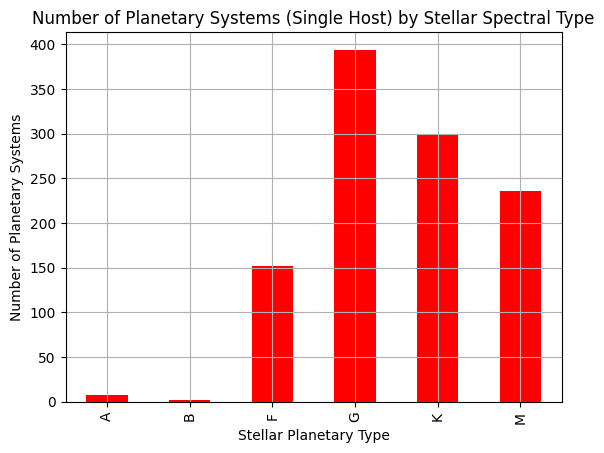

In [244]:
stellar_system_pl_type_stats['st_spectype_short'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Stellar Planetary Type',
    ylabel='Number of Planetary Systems',
    title='Number of Planetary Systems (Single Host) by Stellar Spectral Type',
    grid=True)

stellar_system_pl_type_stats['st_spectype_short'].value_counts()

,count
pl_system_class,
Mixed-Members,306
NeptuneLike-GasGiant-Only,2174
Terrestrial-SuperEarth-Only,1005


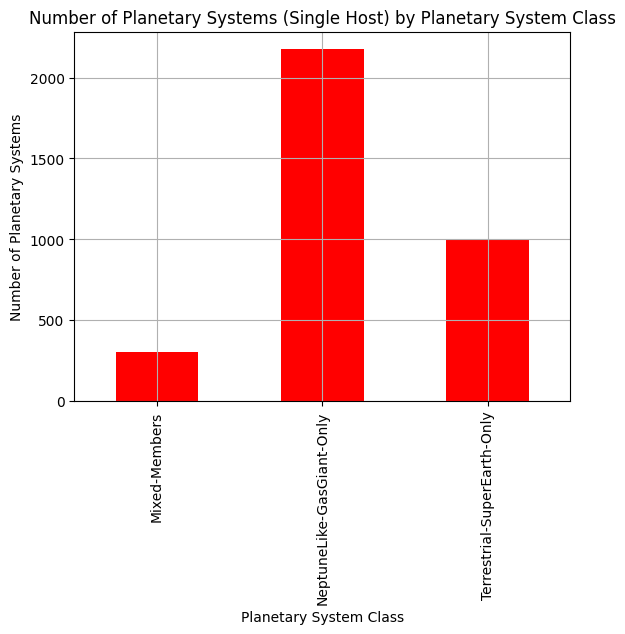

In [245]:
stellar_system_pl_type_stats['pl_system_class'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Planetary System Class',
    ylabel='Number of Planetary Systems',
    title='Number of Planetary Systems (Single Host) by Planetary System Class',
    grid=True)

stellar_system_pl_type_stats['pl_system_class'].value_counts().sort_index()

In [246]:
stellar_system_pl_type_stats.to_csv(
    '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/PlanetarySystemClassification/PlanetarySystemClassies-NASA-HWC.csv'
)

In [247]:
stellar_system_class_type_percent = pd.DataFrame(stellar_system_pl_type_stats['pl_system_class'].value_counts().reset_index().values,
                                                 columns=['pl_system_class', 'pl_system_class_percent'])
total = stellar_system_class_type_percent['pl_system_class_percent'].sum()
stellar_system_class_type_percent['pl_system_class_percent'] = stellar_system_class_type_percent['pl_system_class_percent'] / total

stellar_system_class_type_percent

,pl_system_class,pl_system_class_percent
0,NeptuneLike-GasGiant-Only,0.623816
1,Terrestrial-SuperEarth-Only,0.288379
2,Mixed-Members,0.087805


In [248]:
exoplanets_plot_data = pd.merge(exoplanets_plot_data,
                                stellar_system_pl_type_stats[['pl_system_class']],
                                how="left",
                                left_on=exoplanets_plot_data['hostname'].str.lower(),
                                right_on=stellar_system_pl_type_stats['hostname'].str.lower())
exoplanets_plot_data = exoplanets_plot_data.drop(['key_0'], axis = 1)

In [249]:
exoplanets_plot_data.to_csv(
    '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/PlanetarySystemClassification/PlanetarySystemData-NASA-HWC.csv'
)

In [250]:
exoplanets_data_for_lm = exoplanets_plot_data[['pl_name', 'hostname', 'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_bmasse', 'pl_orbeccen',
                                              'pl_insol', 'pl_eqt',
                                              'st_spectype', 'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_logg', 'st_spectype_short',
                                              'pl_tsurf_c', 'pl_hz_status', 'pl_type', 'P_HABITABLE', 'hz_zone_inner', 'hz_zone_outer',
                                              'pl_system_class']]
exoplanets_data_for_lm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pl_name            4759 non-null   object 
 1   hostname           4759 non-null   object 
 2   pl_orbper          4719 non-null   float64
 3   pl_orbsmax         4759 non-null   float64
 4   pl_rade            4759 non-null   float64
 5   pl_bmasse          4737 non-null   float64
 6   pl_orbeccen        4421 non-null   float64
 7   pl_insol           3732 non-null   float64
 8   pl_eqt             3899 non-null   float64
 9   st_spectype        4759 non-null   object 
 10  st_teff            4759 non-null   float64
 11  st_rad             4759 non-null   float64
 12  st_mass            4759 non-null   float64
 13  st_met             4577 non-null   float64
 14  st_logg            4752 non-null   float64
 15  st_spectype_short  1582 non-null   object 
 16  pl_tsurf_c         4759 

In [251]:
exoplanets_data_for_lm.to_csv(
    '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/PlanetarySystemClassification/PlanetarySystemDataForLmClassification.csv'
)

In [255]:
planetary_system_lm_classes_filename = '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/PlanetarySystemClassification/PlanetarySystemLmClassificationResults.csv'
planetary_system_lm_classes_data = pd.read_csv(planetary_system_lm_classes_filename)
planetary_system_lm_classes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3527 entries, 0 to 3526
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   st_host_name  3527 non-null   object
 1   pl_lm_class   818 non-null    object
dtypes: object(2)
memory usage: 55.2+ KB


In [257]:
exoplanets_plot_data = pd.merge(exoplanets_plot_data,
                                planetary_system_lm_classes_data[['pl_lm_class']],
                                how="left",
                                left_on=exoplanets_plot_data['hostname'].str.lower(),
                                right_on=planetary_system_lm_classes_data['st_host_name'].str.lower())
exoplanets_plot_data = exoplanets_plot_data.drop(['key_0'], axis = 1)
exoplanets_plot_data['pl_lm_class'].value_counts()

,count
pl_lm_class,
Similar,968
Ordered,894
Anti-ordered,137
Mixed,31


In [258]:
exoplanets_plot_data['pl_type'].value_counts()

,count
pl_type,
Neptune-Like,1703
Super-Earth,1511
Gas-Giant,1274
Terrestrial,173


In [259]:
exoplanets_plot_data['P_HABITABLE'].value_counts()

,count
P_HABITABLE,
0.0,4517
2.0,31
1.0,24


In [260]:
exoplanets_plot_data['pl_system_class'].value_counts()

,count
pl_system_class,
NeptuneLike-GasGiant-Only,2550
Terrestrial-SuperEarth-Only,1290
Mixed-Members,838


,count
pl_lm_class,
Ordered,381
Similar,366
Anti-ordered,63
Mixed,8


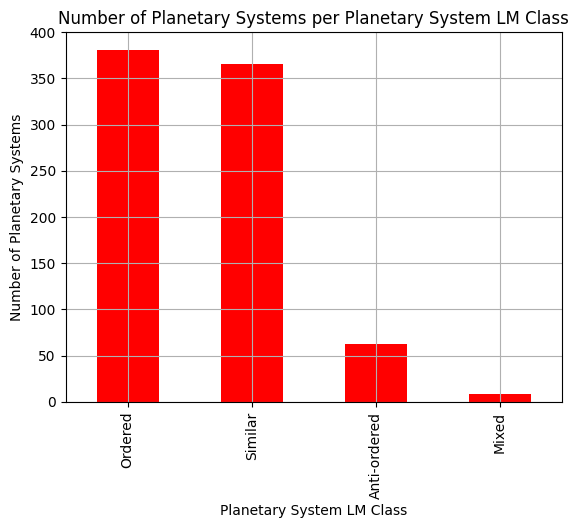

In [261]:
planetary_system_lm_class_count = exoplanets_plot_data.value_counts(
    ['hostname', 'pl_lm_class']).reset_index(name='pl_lm_class_count')

planetary_system_lm_class_count['pl_lm_class'].value_counts().plot(
    kind='bar',
    color='red',
    xlabel='Planetary System LM Class',
    ylabel='Number of Planetary Systems',
    title='Number of Planetary Systems per Planetary System LM Class',
    grid=True)

planetary_system_lm_class_count['pl_lm_class'].value_counts()

,pl_lm_class,pl_lm_class_percent
0,Ordered,0.46577
1,Similar,0.447433
2,Anti-ordered,0.077017
3,Mixed,0.00978


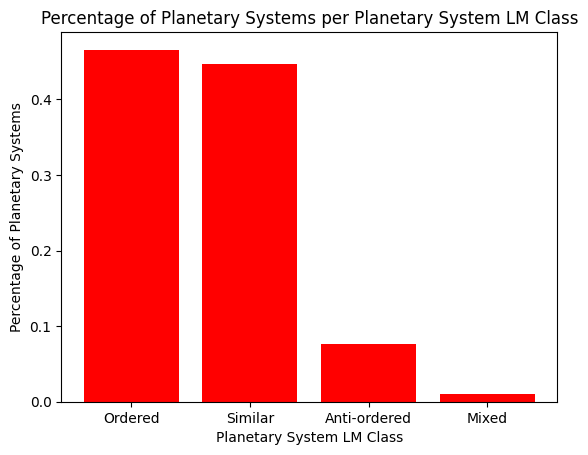

In [262]:
planetary_system_lm_class_percent = pd.DataFrame(planetary_system_lm_class_count['pl_lm_class'].value_counts().reset_index().values,
                                                 columns=['pl_lm_class', 'pl_lm_class_percent'])
total = planetary_system_lm_class_percent['pl_lm_class_percent'].sum()
planetary_system_lm_class_percent['pl_lm_class_percent'] = planetary_system_lm_class_percent['pl_lm_class_percent'] / total

plt.bar(planetary_system_lm_class_percent['pl_lm_class'],
        planetary_system_lm_class_percent['pl_lm_class_percent'],
        color='red')
plt.title('Percentage of Planetary Systems per Planetary System LM Class')
plt.xlabel('Planetary System LM Class')
plt.ylabel('Percentage of Planetary Systems')

planetary_system_lm_class_percent

,count
pl_hz_status,
Too Hot,360
Too Cold,99
In HZ,53


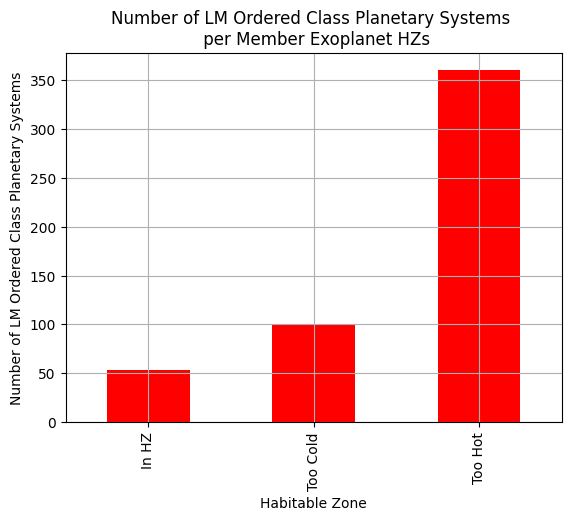

In [275]:
lm_ordered_class_planetary_system_exoplanet_data_ = exoplanets_plot_data.loc[(exoplanets_plot_data['pl_lm_class'] == 'Ordered')]

lm_ordered_class_planetary_system_hz_count = lm_ordered_class_planetary_system_exoplanet_data_.value_counts(
    ['hostname', 'pl_hz_status']).reset_index(name='pl_hz_status_count')

lm_ordered_class_planetary_system_hz_count['pl_hz_status'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Habitable Zone',
    ylabel='Number of LM Ordered Class Planetary Systems',
    title='Number of LM Ordered Class Planetary Systems \n per Member Exoplanet HZs',
    grid=True)

lm_ordered_class_planetary_system_hz_count['pl_hz_status'].value_counts()

,count
P_HABITABLE,
0.0,373
2.0,7
1.0,2


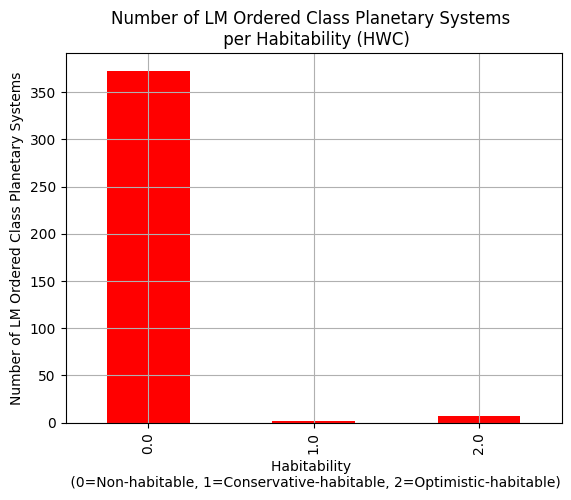

In [274]:
lm_ordered_class_planetary_system_hwc_hp_count = lm_ordered_class_planetary_system_exoplanet_data_.value_counts(
    ['hostname', 'P_HABITABLE']).reset_index(name='P_HABITABLE_count')

lm_ordered_class_planetary_system_hwc_hp_count['P_HABITABLE'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Habitability \n (0=Non-habitable, 1=Conservative-habitable, 2=Optimistic-habitable)',
    ylabel='Number of LM Ordered Class Planetary Systems',
    title='Number of LM Ordered Class Planetary Systems \n per Habitability (HWC)',
    grid=True)

lm_ordered_class_planetary_system_hwc_hp_count['P_HABITABLE'].value_counts()

,count
pl_system_class,
Mixed-Members,157
NeptuneLike-GasGiant-Only,144
Terrestrial-SuperEarth-Only,76


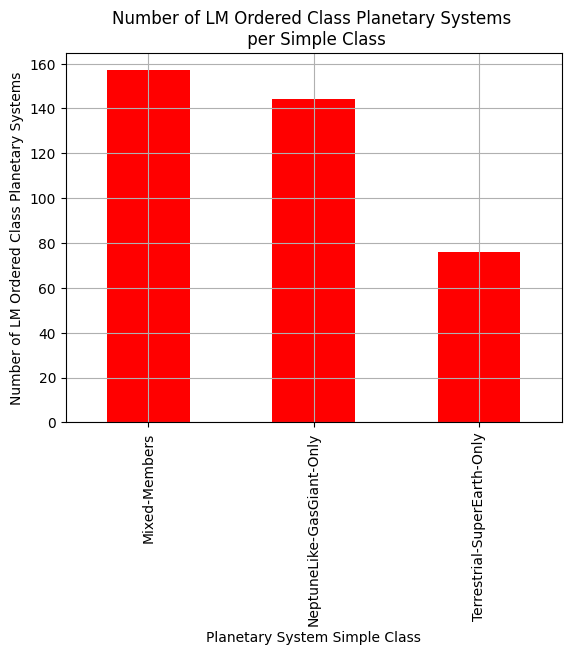

In [264]:
lm_ordered_class_planetary_system_simple_class_count = lm_ordered_class_planetary_system_exoplanet_data_.value_counts(
    ['hostname', 'pl_system_class']).reset_index(name='pl_system_class_count')

lm_ordered_class_planetary_system_simple_class_count['pl_system_class'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Planetary System Simple Class',
    ylabel='Number of LM Ordered Class Planetary Systems',
    title='Number of LM Ordered Class Planetary Systems \n per Simple Class',
    grid=True)

lm_ordered_class_planetary_system_simple_class_count['pl_system_class'].value_counts()

,count
pl_hz_status,
Too Hot,345
In HZ,56
Too Cold,38


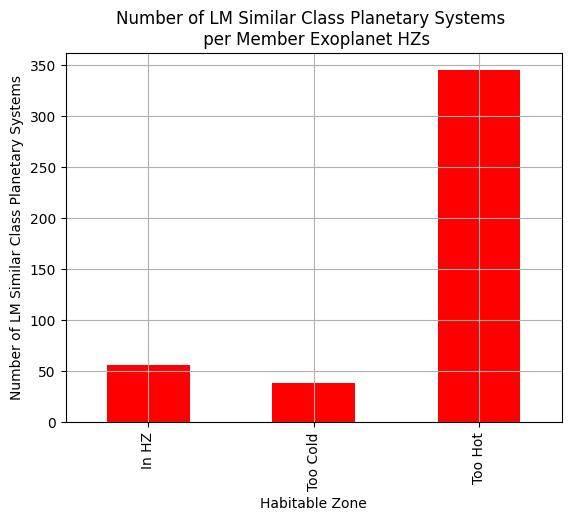

In [276]:
lm_similar_class_planetary_system_exoplanet_data_ = exoplanets_plot_data.loc[(exoplanets_plot_data['pl_lm_class'] == 'Similar')]

lm_similar_class_planetary_system_hz_count = lm_similar_class_planetary_system_exoplanet_data_.value_counts(
    ['hostname', 'pl_hz_status']).reset_index(name='pl_hz_status_count')

lm_similar_class_planetary_system_hz_count['pl_hz_status'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Habitable Zone',
    ylabel='Number of LM Similar Class Planetary Systems',
    title='Number of LM Similar Class Planetary Systems \n per Member Exoplanet HZs',
    grid=True)

lm_similar_class_planetary_system_hz_count['pl_hz_status'].value_counts()

,count
P_HABITABLE,
0.0,356
1.0,8
2.0,7


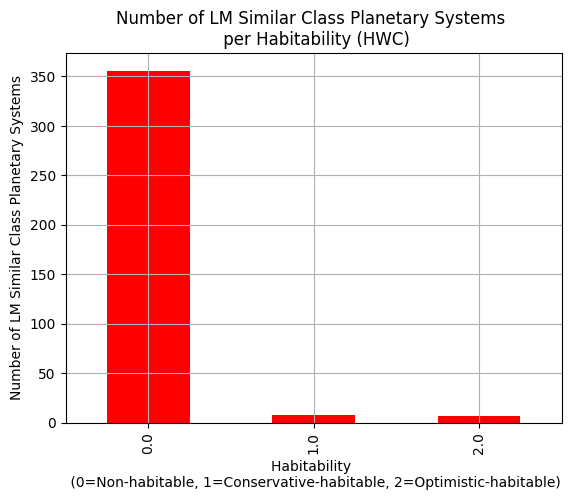

In [277]:
lm_similar_class_planetary_system_hwc_hp_count = lm_similar_class_planetary_system_exoplanet_data_.value_counts(
    ['hostname', 'P_HABITABLE']).reset_index(name='P_HABITABLE_count')

lm_similar_class_planetary_system_hwc_hp_count['P_HABITABLE'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Habitability \n (0=Non-habitable, 1=Conservative-habitable, 2=Optimistic-habitable)',
    ylabel='Number of LM Similar Class Planetary Systems',
    title='Number of LM Similar Class Planetary Systems \n per Habitability (HWC)',
    grid=True)

lm_similar_class_planetary_system_hwc_hp_count['P_HABITABLE'].value_counts()

,count
pl_system_class,
NeptuneLike-GasGiant-Only,136
Mixed-Members,117
Terrestrial-SuperEarth-Only,106


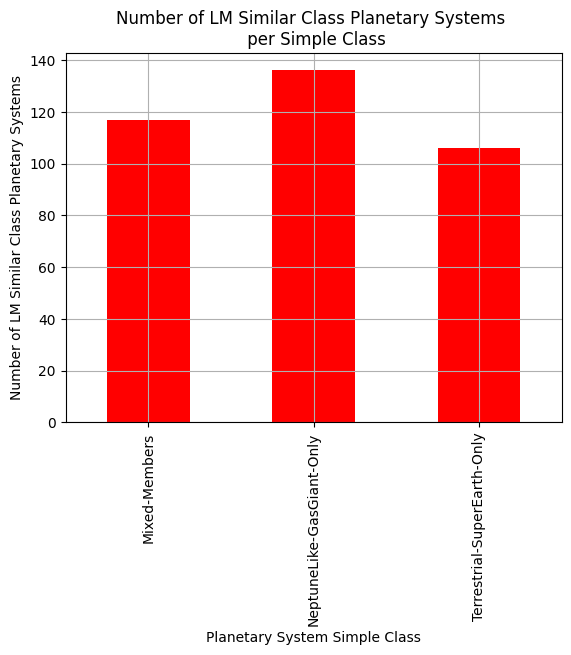

In [266]:
lm_similar_class_planetary_system_simple_class_count = lm_similar_class_planetary_system_exoplanet_data_.value_counts(
    ['hostname', 'pl_system_class']).reset_index(name='pl_system_class_count')

lm_similar_class_planetary_system_simple_class_count['pl_system_class'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Planetary System Simple Class',
    ylabel='Number of LM Similar Class Planetary Systems',
    title='Number of LM Similar Class Planetary Systems \n per Simple Class',
    grid=True)

lm_similar_class_planetary_system_simple_class_count['pl_system_class'].value_counts()

,count
pl_hz_status,
Too Hot,58
Too Cold,6
In HZ,5


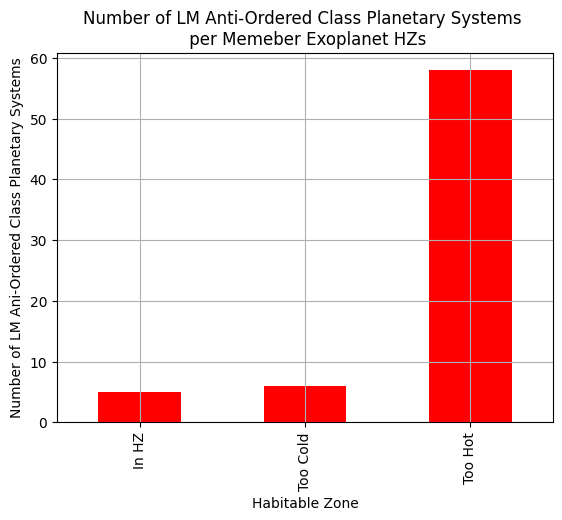

In [267]:
lm_anti_ordered_class_planetary_system_exoplanet_data_ = exoplanets_plot_data.loc[(exoplanets_plot_data['pl_lm_class'] == 'Anti-ordered')]

lm_anti_ordered_class_planetary_system_hz_count = lm_anti_ordered_class_planetary_system_exoplanet_data_.value_counts(
    ['hostname', 'pl_hz_status']).reset_index(name='pl_hz_status_count')

lm_anti_ordered_class_planetary_system_hz_count['pl_hz_status'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Habitable Zone',
    ylabel='Number of LM Ani-Ordered Class Planetary Systems',
    title='Number of LM Anti-Ordered Class Planetary Systems \n per Memeber Exoplanet HZs',
    grid=True)

lm_anti_ordered_class_planetary_system_hz_count['pl_hz_status'].value_counts()

,count
P_HABITABLE,
0.0,63


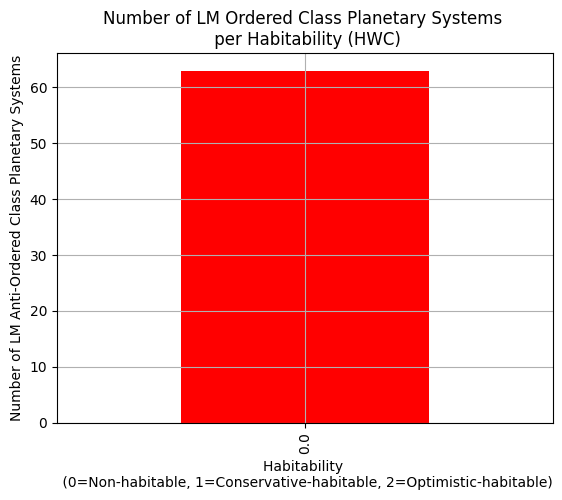

In [278]:
lm_anti_ordered_class_planetary_system_hwc_hp_count = lm_anti_ordered_class_planetary_system_exoplanet_data_.value_counts(
    ['hostname', 'P_HABITABLE']).reset_index(name='P_HABITABLE_count')

lm_anti_ordered_class_planetary_system_hwc_hp_count['P_HABITABLE'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Habitability \n (0=Non-habitable, 1=Conservative-habitable, 2=Optimistic-habitable)',
    ylabel='Number of LM Anti-Ordered Class Planetary Systems',
    title='Number of LM Ordered Class Planetary Systems \n per Habitability (HWC)',
    grid=True)

lm_anti_ordered_class_planetary_system_hwc_hp_count['P_HABITABLE'].value_counts()

,count
pl_system_class,
Mixed-Members,27
NeptuneLike-GasGiant-Only,18
Terrestrial-SuperEarth-Only,15


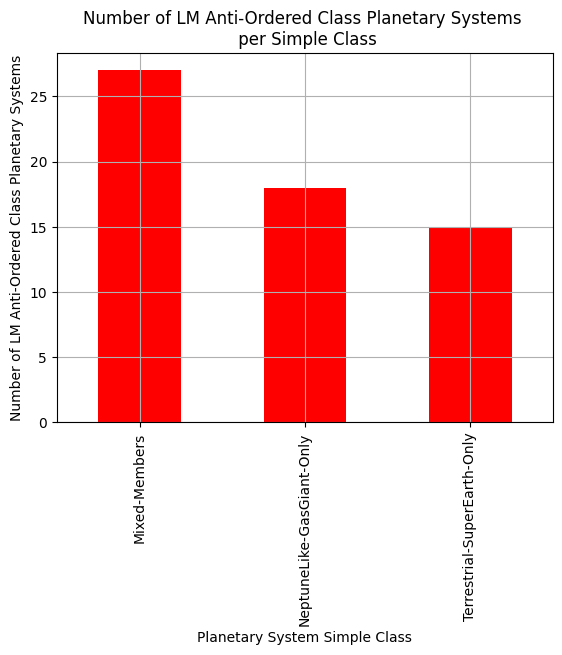

In [268]:
lm_anti_ordered_class_planetary_system_simple_class_count = lm_anti_ordered_class_planetary_system_exoplanet_data_.value_counts(
    ['hostname', 'pl_system_class']).reset_index(name='pl_system_class_count')

lm_anti_ordered_class_planetary_system_simple_class_count['pl_system_class'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Planetary System Simple Class',
    ylabel='Number of LM Anti-Ordered Class Planetary Systems',
    title='Number of LM Anti-Ordered Class Planetary Systems \n per Simple Class',
    grid=True)

lm_anti_ordered_class_planetary_system_simple_class_count['pl_system_class'].value_counts()

,count
pl_hz_status,
Too Hot,8
Too Cold,1
In HZ,1


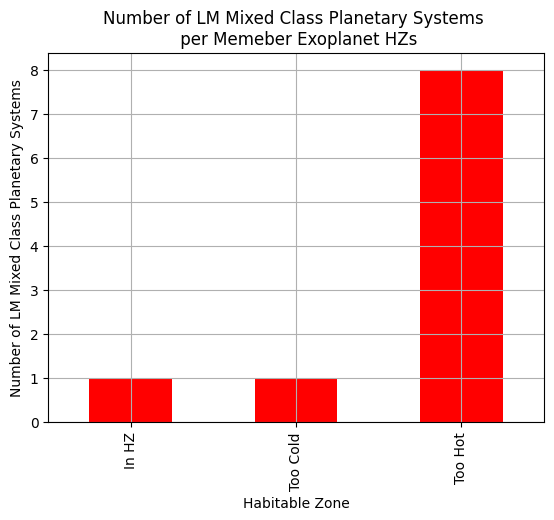

In [269]:
lm_mixed_class_planetary_system_exoplanet_data_ = exoplanets_plot_data.loc[(exoplanets_plot_data['pl_lm_class'] == 'Mixed')]

lm_mixed_class_planetary_system_hz_count = lm_mixed_class_planetary_system_exoplanet_data_.value_counts(
    ['hostname', 'pl_hz_status']).reset_index(name='pl_hz_status_count')

lm_mixed_class_planetary_system_hz_count['pl_hz_status'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Habitable Zone',
    ylabel='Number of LM Mixed Class Planetary Systems',
    title='Number of LM Mixed Class Planetary Systems \n per Memeber Exoplanet HZs',
    grid=True)

lm_mixed_class_planetary_system_hz_count['pl_hz_status'].value_counts()

,count
P_HABITABLE,
0.0,8
1.0,1


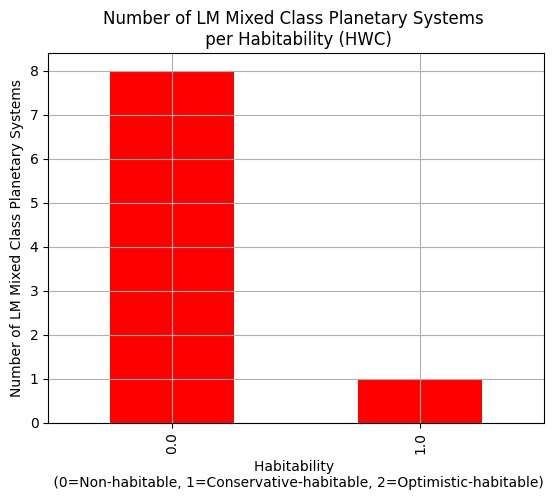

In [279]:
lm_mixed_class_planetary_system_hwc_hp_count = lm_mixed_class_planetary_system_exoplanet_data_.value_counts(
    ['hostname', 'P_HABITABLE']).reset_index(name='P_HABITABLE_count')

lm_mixed_class_planetary_system_hwc_hp_count['P_HABITABLE'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Habitability \n (0=Non-habitable, 1=Conservative-habitable, 2=Optimistic-habitable)',
    ylabel='Number of LM Mixed Class Planetary Systems',
    title='Number of LM Mixed Class Planetary Systems \n per Habitability (HWC)',
    grid=True)

lm_mixed_class_planetary_system_hwc_hp_count['P_HABITABLE'].value_counts()

,count
pl_system_class,
Mixed-Members,4
Terrestrial-SuperEarth-Only,2
NeptuneLike-GasGiant-Only,2


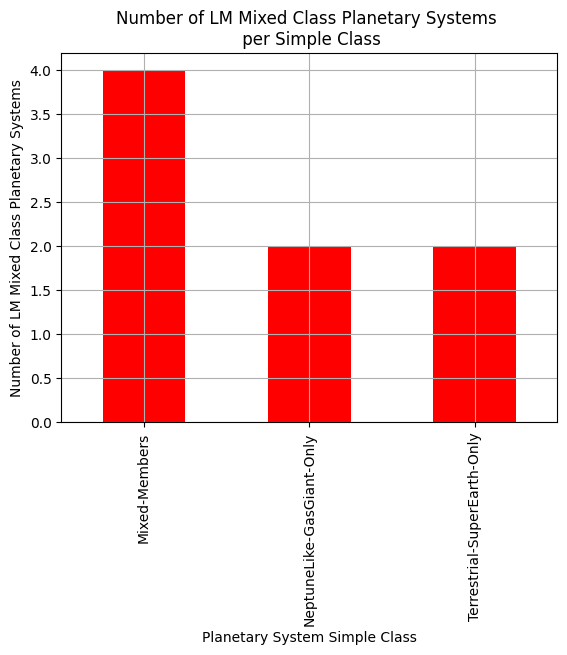

In [270]:
lm_mixed_class_planetary_system_simple_class_count = lm_mixed_class_planetary_system_exoplanet_data_.value_counts(
    ['hostname', 'pl_system_class']).reset_index(name='pl_system_class_count')

lm_mixed_class_planetary_system_simple_class_count['pl_system_class'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Planetary System Simple Class',
    ylabel='Number of LM Mixed Class Planetary Systems',
    title='Number of LM Mixed Class Planetary Systems \n per Simple Class',
    grid=True)

lm_mixed_class_planetary_system_simple_class_count['pl_system_class'].value_counts()